In [1]:
!pip install detoxify

In [2]:
from detoxify import Detoxify
model = Detoxify('original', device='cuda')

Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt
100%|██████████| 418M/418M [00:03<00:00, 127MB/s]  


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [17]:
comment = "i did not like what you just said, it was so out of world. i will kill you if you say it again. you are the unluckiest among all of these. just like a dog"

In [18]:
text = comment

results1 = Detoxify('original').predict(text)
print("toxicity: ",float(results1['toxicity'])*100, "severe_toxicity: ",float(results1['severe_toxicity'])*100, "obscene: ",float(results1['obscene'])*100, "threat: ",float(results1['threat'])*100, "insult: ",float(results1['insult'])*100, "identity_attack: ",float(results1['identity_attack'])*100)

results2 = Detoxify('unbiased').predict(text)
print("toxicity: ",float(results2['toxicity'])*100, "severe_toxicity: ",float(results2['severe_toxicity'])*100, "obscene: ",float(results2['obscene'])*100, "threat: ",float(results2['threat'])*100, "insult: ",float(results2['insult'])*100, "identity_attack: ",float(results2['identity_attack'])*100)

results3 = Detoxify('multilingual').predict(text)
print("toxicity: ",float(results3['toxicity'])*100, "severe_toxicity: ",float(results3['severe_toxicity'])*100, "obscene: ",float(results3['obscene'])*100, "threat: ",float(results3['threat'])*100, "insult: ",float(results3['insult'])*100, "identity_attack: ",float(results3['identity_attack'])*100)

toxicity:  95.6358551979065 severe_toxicity:  5.218856036663055 obscene:  16.07678234577179 threat:  66.89425706863403 insult:  52.03374624252319 identity_attack:  4.451243206858635
toxicity:  99.08431768417358 severe_toxicity:  0.6074138917028904 obscene:  6.63992241024971 threat:  74.92071390151978 insult:  82.29464292526245 identity_attack:  1.3281197287142277
toxicity:  98.1403112411499 severe_toxicity:  0.20466207060962915 obscene:  1.3338608667254448 threat:  42.773452401161194 insult:  82.87492990493774 identity_attack:  0.5110471975058317


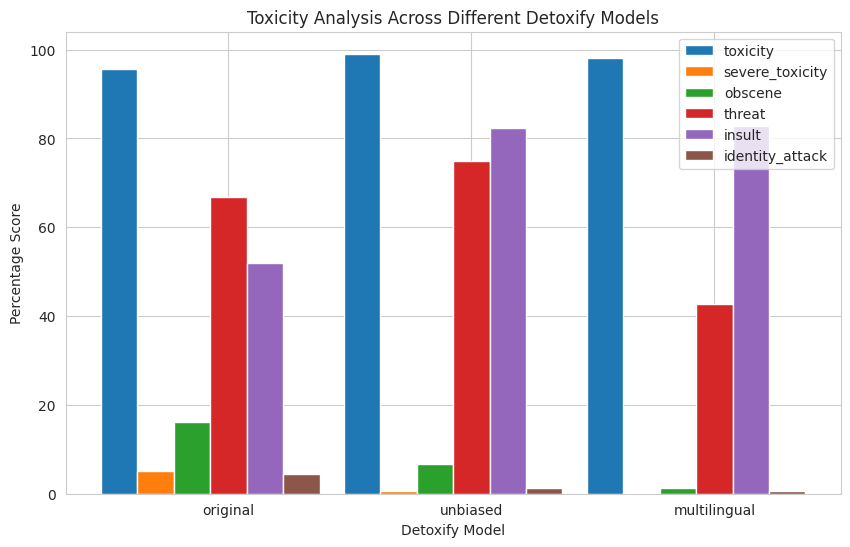

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Model names
models = ['original', 'unbiased', 'multilingual']

# Toxicity scores for each model
data = {
    'toxicity': [results1['toxicity']*100, results2['toxicity']*100, results3['toxicity']*100],
    'severe_toxicity': [results1['severe_toxicity']*100, results2['severe_toxicity']*100, results3['severe_toxicity']*100],
    'obscene': [results1['obscene']*100, results2['obscene']*100, results3['obscene']*100],
    'threat': [results1['threat']*100, results2['threat']*100, results3['threat']*100],
    'insult': [results1['insult']*100, results2['insult']*100, results3['insult']*100],
    'identity_attack': [results1['identity_attack']*100, results2['identity_attack']*100, results3['identity_attack']*100]
}

# Set up plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

# Plot bars for each toxicity category
offset = -width * (len(data) // 2)
for i, (category, values) in enumerate(data.items()):
    ax.bar(x + offset, values, width, label=category)
    offset += width

# Labels and titles
ax.set_xlabel("Detoxify Model")
ax.set_ylabel("Percentage Score")
ax.set_title("Toxicity Analysis Across Different Detoxify Models")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.show()